## Calculate expression scores for ces + identify BRCAness mutants

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets, linear_model
import scipy.stats

In [2]:
def plot_linear_fit(X,Y, ylim=None):

    length = merged[merged['BRCA_mutant']].shape[0]

    x = merged[merged['BRCA_mutant']][X].values
    y = merged[merged['BRCA_mutant']][Y].values
    x = x.reshape(length, 1)
    y = y.reshape(length, 1)

    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    # plot it as in the example at http://scikit-learn.org/
    plt.scatter(x, y,  color='lightblue')
    plt.plot(x, regr.predict(x), color='blue', linewidth=3, label='BRCAness Mutant')

    length = merged[merged['BRCA_mutant']==False].shape[0]

    x = merged[merged['BRCA_mutant']==False][X].values
    y = merged[merged['BRCA_mutant']==False][Y].values
    x = x.reshape(length, 1)
    y = y.reshape(length, 1)

    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    # plot it as in the example at http://scikit-learn.org/
    plt.scatter(x, y,  color='orange')
    plt.plot(x, regr.predict(x), color='red', linewidth=3, label='BRCAness wild type')
    # plt.xticks(())
    # plt.yticks(())

    plt.legend()
    
    if ylim is not None:
        plt.ylim(ylim[0],ylim[1])
    
    plt.xlabel(X)
    plt.ylabel(Y)

    return

In [3]:
BRCAness = ["TP53","ATM","ATR","PALB2","CHEK2","RAD51D","BAP1","BRCA1","BRCA2","CDK12","FANCA","FANCC","FANCD2","FANCE","FANCF","NLRP2","WRN","RAD51C","MRE11","CHEK1","BLM","RAD51","BRIP1"]
CES = ["CENPA","CENPK","CENPL","CENPM","CENPN","CENPW","HJURP","CENPU","NDC80","NUF2","OIP5","SPC24","SPC25","ZWINT","CENPU"]

In [5]:
def display(X,Y):
    fig, ax = plt.subplots()
    # colors = ['red','green','blue']
    # ax.scatter(df['ces'], df['rps'])
    plt.xlabel(X)
    plt.ylabel(Y)
    ax.grid(True, which='both')

    plt.scatter(merged[merged['BRCA_mutant']][X], 
                merged[merged['BRCA_mutant']][Y], label='Mutant')
    plt.scatter(merged[merged['BRCA_mutant']==False][X], 
                merged[merged['BRCA_mutant']==False][Y], label='Non Mutant')

    ax.yaxis.get_data_interval()
    ax.xaxis.get_data_interval()
    plt.legend()

    return

## Breast Cancer

In [6]:
import pandas as pd
z_scores = pd.read_csv('brca_tcga_pub2015/z_scores.txt', sep='\t').fillna(0)
BRCA_mutations = pd.read_csv('brca_tcga_pub2015/mutations.txt', sep='\t').fillna('')
mutations_cna = pd.read_csv('brca_tcga_pub2015/Mutation Count vs. CNA.txt', sep='\t')
z_scores.shape, BRCA_mutations.shape, mutations_cna.shape

z_scores['CES'] = z_scores[z_scores.columns.intersection(CES)].sum(axis=1)
BRCA_mutations['BRCA_mutant'] = BRCA_mutations[BRCA_mutations.columns.intersection(BRCAness)][1:].sum(axis=1)!=''

In [7]:
columns = ['COMMON','CES','BRCA_mutant', 'Mutation Count', 'CNA']

merged = BRCA_mutations.merge(z_scores, how='inner',on='COMMON')
merged = merged[merged.columns.intersection(columns)]
merged = merged.merge(mutations_cna, left_on='COMMON', right_on='Sample ID')
merged = merged[merged.columns.intersection(columns)]

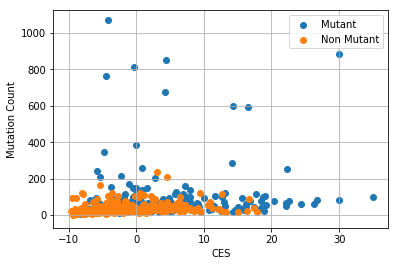

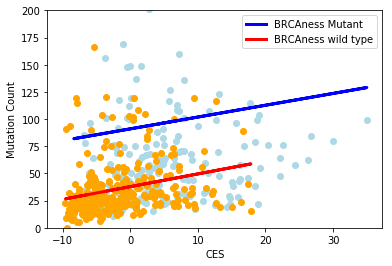

In [8]:
X = 'CES'
Y = 'Mutation Count'

display (X,Y)
plt.show()

plot_linear_fit(X,Y, ylim=[0,200])
# plt.title('TEST')
plt.show()

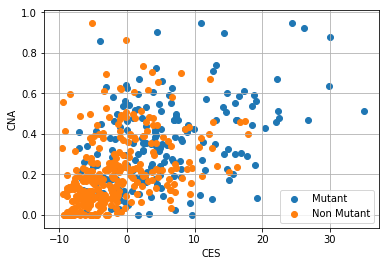

In [9]:
Y = 'CNA'

display(X,Y)
plt.show()

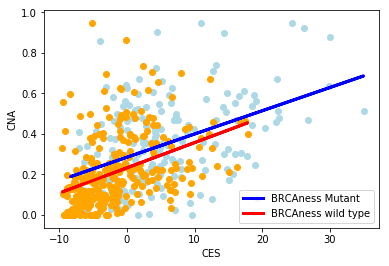

In [10]:
plot_linear_fit(X,Y)
plt.show()

In [304]:
print('Spearman Correlation P-value between CES and mutation for:')
print('BRCA Mutant')
print(scipy.stats.spearmanr(merged[merged['BRCA_mutant']]['CES'], merged[merged['BRCA_mutant']]['Mutation Count']).pvalue)

print('BRCA Wild type')
print(scipy.stats.spearmanr(merged[merged['BRCA_mutant']==False]['CES'], merged[merged['BRCA_mutant']==False]['Mutation Count']).pvalue)

Spearman Correlation P-value between CES and mutation for:
BRCA Mutant
0.0219091350475
BRCA Wild type
1.5525371285e-09


## Prostate Cancer

Prostate Adenocarcinoma (TCGA, Cell 2015)

In [305]:
import pandas as pd
z_scores = pd.read_csv('prad_tcga_pub/z_scores.txt', sep='\t').fillna(0)
BRCA_mutations = pd.read_csv('prad_tcga_pub/mutations.txt', sep='\t').fillna('')
mutations_cna = pd.read_csv('prad_tcga_pub/Mutation Count vs. CNA.txt', sep='\t')
z_scores.shape, BRCA_mutations.shape, mutations_cna.shape

z_scores['CES'] = z_scores[z_scores.columns.intersection(CES)].sum(axis=1)
BRCA_mutations['BRCA_mutant'] = BRCA_mutations[BRCA_mutations.columns.intersection(BRCAness)][1:].sum(axis=1)!=''

In [306]:
columns = ['COMMON','CES','BRCA_mutant', 'Mutation Count', 'CNA']

merged = BRCA_mutations.merge(z_scores, how='inner',on='COMMON')
merged = merged[merged.columns.intersection(columns)]
merged = merged.merge(mutations_cna, left_on='COMMON', right_on='Sample ID')
merged = merged[merged.columns.intersection(columns)]

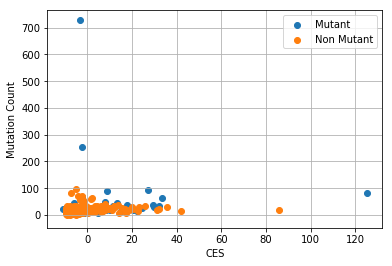

In [307]:
X = 'CES'
Y = 'Mutation Count'
display (X,Y)
plt.show()

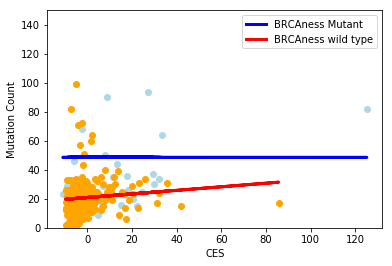

In [308]:
plot_linear_fit(X,Y, ylim=[0,150])
plt.show()

In [309]:
print('Spearman Correlation P-value between %s and %s for :' % (X, Y))
print('BRCA Mutant')
print(scipy.stats.spearmanr(merged[merged['BRCA_mutant']][X], merged[merged['BRCA_mutant']][Y]).pvalue)

print('BRCA Wild type')
print(scipy.stats.spearmanr(merged[merged['BRCA_mutant']==False][X], 
                            merged[merged['BRCA_mutant']==False][Y]).pvalue)



Spearman Correlation P-value between CES and Mutation Count for :
BRCA Mutant
0.0578332875823
BRCA Wild type
4.9242603038e-06


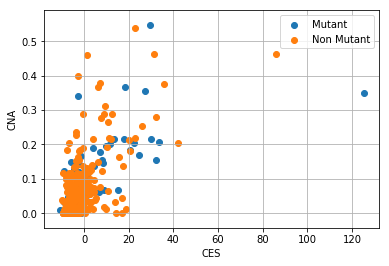

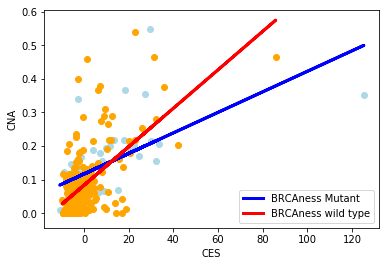

In [310]:
Y = 'CNA'

display(X,Y)
plt.show()
plot_linear_fit(X,Y)
plt.show()

In [311]:
print('Spearman Correlation P-value between %s and %s for :' % (X, Y))
print('BRCA Mutant')
print(scipy.stats.spearmanr(merged[merged['BRCA_mutant']][X], merged[merged['BRCA_mutant']][Y]).pvalue)

print('BRCA Wild type')
print(scipy.stats.spearmanr(merged[merged['BRCA_mutant']==False][X], 
                            merged[merged['BRCA_mutant']==False][Y]).pvalue)



Spearman Correlation P-value between CES and CNA for :
BRCA Mutant
2.49865834269e-08
BRCA Wild type
6.46119652129e-16


## Kidney Cancer

Kidney Renal Clear Cell Carcinoma (TCGA, Nature 2013)

In [312]:
import pandas as pd
z_scores = pd.read_csv('kirc_tcga_pub/z_scores.txt', sep='\t').fillna(0)
BRCA_mutations = pd.read_csv('kirc_tcga_pub/mutations.txt', sep='\t').fillna('')
mutations_cna = pd.read_csv('kirc_tcga_pub/Mutation Count vs. CNA.txt', sep='\t')
z_scores.shape, BRCA_mutations.shape, mutations_cna.shape

z_scores['CES'] = z_scores[z_scores.columns.intersection(CES)].sum(axis=1)
BRCA_mutations['BRCA_mutant'] = BRCA_mutations[BRCA_mutations.columns.intersection(BRCAness)][1:].sum(axis=1)!=''

In [313]:
columns = ['COMMON','CES','BRCA_mutant', 'Mutation Count', 'CNA']

merged = BRCA_mutations.merge(z_scores, how='inner',on='COMMON')
merged = merged[merged.columns.intersection(columns)]
merged = merged.merge(mutations_cna, left_on='COMMON', right_on='Sample ID')
merged = merged[merged.columns.intersection(columns)]

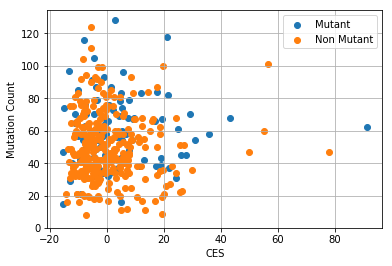

In [314]:
X = 'CES'
Y = 'Mutation Count'
display (X,Y)
plt.show()

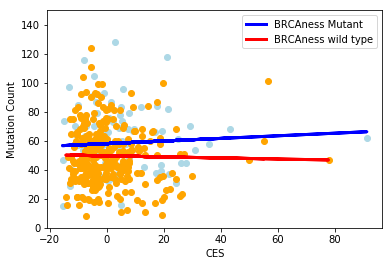

In [315]:
plot_linear_fit(X,Y, ylim=[0,150])
plt.show()

In [316]:
print('Spearman Correlation P-value between %s and %s for :' % (X, Y))
print('BRCA Mutant')
print(scipy.stats.spearmanr(merged[merged['BRCA_mutant']][X], merged[merged['BRCA_mutant']][Y]).pvalue)

print('BRCA Wild type')
print(scipy.stats.spearmanr(merged[merged['BRCA_mutant']==False][X], 
                            merged[merged['BRCA_mutant']==False][Y]).pvalue)



Spearman Correlation P-value between CES and Mutation Count for :
BRCA Mutant
0.331599524859
BRCA Wild type
0.577778661336


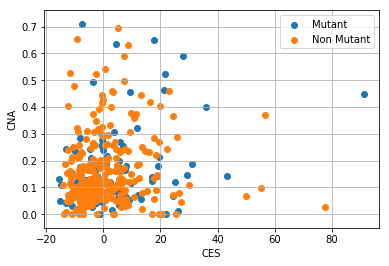

In [317]:
Y = 'CNA'

display(X,Y)
plt.show()

In [318]:
plot_linear_fit(X,Y)
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
print('Spearman Correlation P-value between %s and %s for :' % (X, Y))
print('BRCA Mutant')
print(scipy.stats.spearmanr(merged[merged['BRCA_mutant']][X], merged[merged['BRCA_mutant']][Y]).pvalue)

print('BRCA Wild type')
print(scipy.stats.spearmanr(merged[merged['BRCA_mutant']==False][X], 
                            merged[merged['BRCA_mutant']==False][Y]).pvalue)



In [ ]:
merged[merged['BRCA_mutant']==False]['CNA'].min()